In [6]:
from helpers.locations import *
from helpers.drugs import *
from helpers.dates import *
from helpers.population import CountyNormalizer
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
county_normalizer = CountyNormalizer()

# df_drug = pd.read_csv("data/drugs/US_Oxycodone.csv")
DRUG_NAMES = ["US_Amphetamine", "US_Codeine", "US_Hydrocodone", "US_Morphine", "US_Oxycodone"]
df_drug = get_drugs_dfs(DRUG_NAMES)
df_drug = df_drug.generate_state_column("placeDcid")
df_drug = df_drug.generate_year()
df_drug['FIPS'] = df_drug['placeDcid'].str.split('/').str[-1]
df_drug["population"] = df_drug.apply(county_normalizer.get_population, axis=1)
df_drug.dropna(inplace= True)
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
0,geoId/01001,Autauga County,2006-01,301.62,456.09,1484.79,472.42,720.13,Alabama,2006,01001,49105.0
1,geoId/01001,Autauga County,2006-04,277.00,500.07,1641.61,535.16,776.14,Alabama,2006,01001,49105.0
2,geoId/01001,Autauga County,2006-07,280.13,442.30,1660.31,459.76,707.36,Alabama,2006,01001,49105.0
3,geoId/01001,Autauga County,2006-10,323.46,425.44,1977.05,487.07,769.49,Alabama,2006,01001,49105.0
4,geoId/01001,Autauga County,2007-01,341.98,447.23,1989.93,528.35,763.86,Alabama,2007,01001,49834.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150763,geoId/56045,Weston County,2016-10,59.48,45.19,103.31,42.03,159.98,Wyoming,2016,56045,7228.0
150764,geoId/56045,Weston County,2017-01,58.34,46.35,100.78,43.06,153.44,Wyoming,2017,56045,6962.0
150765,geoId/56045,Weston County,2017-04,54.30,32.44,95.51,52.34,154.04,Wyoming,2017,56045,6962.0
150766,geoId/56045,Weston County,2017-07,62.98,36.01,91.86,37.70,142.69,Wyoming,2017,56045,6962.0


In [8]:
# Loop through each drug column and divide by 'population' column
for drug in DRUG_NAMES:
    df_drug[drug] = df_drug[drug] / df_drug['population']
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
0,geoId/01001,Autauga County,2006-01,0.006142,0.009288,0.030237,0.009621,0.014665,Alabama,2006,01001,49105.0
1,geoId/01001,Autauga County,2006-04,0.005641,0.010184,0.033431,0.010898,0.015806,Alabama,2006,01001,49105.0
2,geoId/01001,Autauga County,2006-07,0.005705,0.009007,0.033811,0.009363,0.014405,Alabama,2006,01001,49105.0
3,geoId/01001,Autauga County,2006-10,0.006587,0.008664,0.040262,0.009919,0.015670,Alabama,2006,01001,49105.0
4,geoId/01001,Autauga County,2007-01,0.006862,0.008974,0.039931,0.010602,0.015328,Alabama,2007,01001,49834.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150763,geoId/56045,Weston County,2016-10,0.008229,0.006252,0.014293,0.005815,0.022133,Wyoming,2016,56045,7228.0
150764,geoId/56045,Weston County,2017-01,0.008380,0.006658,0.014476,0.006185,0.022040,Wyoming,2017,56045,6962.0
150765,geoId/56045,Weston County,2017-04,0.007799,0.004660,0.013719,0.007518,0.022126,Wyoming,2017,56045,6962.0
150766,geoId/56045,Weston County,2017-07,0.009046,0.005172,0.013194,0.005415,0.020496,Wyoming,2017,56045,6962.0


In [14]:
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
0,geoId/01001,Autauga County,2006-01,0.006142,0.009288,0.030237,0.009621,0.014665,Alabama,2006,01001,49105.0
1,geoId/01001,Autauga County,2006-04,0.005641,0.010184,0.033431,0.010898,0.015806,Alabama,2006,01001,49105.0
2,geoId/01001,Autauga County,2006-07,0.005705,0.009007,0.033811,0.009363,0.014405,Alabama,2006,01001,49105.0
3,geoId/01001,Autauga County,2006-10,0.006587,0.008664,0.040262,0.009919,0.015670,Alabama,2006,01001,49105.0
4,geoId/01001,Autauga County,2007-01,0.006862,0.008974,0.039931,0.010602,0.015328,Alabama,2007,01001,49834.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150763,geoId/56045,Weston County,2016-10,0.008229,0.006252,0.014293,0.005815,0.022133,Wyoming,2016,56045,7228.0
150764,geoId/56045,Weston County,2017-01,0.008380,0.006658,0.014476,0.006185,0.022040,Wyoming,2017,56045,6962.0
150765,geoId/56045,Weston County,2017-04,0.007799,0.004660,0.013719,0.007518,0.022126,Wyoming,2017,56045,6962.0
150766,geoId/56045,Weston County,2017-07,0.009046,0.005172,0.013194,0.005415,0.020496,Wyoming,2017,56045,6962.0


## Correlations

In [143]:
number_of_counties_per_date = df_drug[(df_drug['Date'] >= '2015-01')].groupby(['Date'])['placeDcid'].count().reset_index()
number_of_counties_per_date.columns = ['Date', 'num_counties']
grouped_df_drug_all = df_drug[(df_drug['Date'] >= '2015-01')].groupby(['Date']).sum().reset_index()
for drug in DRUG_NAMES:
    grouped_df_drug_all[drug] = grouped_df_drug_all[drug] / number_of_counties_per_date['num_counties']
codeine_and_hydrocodone = grouped_df_drug_all[['US_Codeine']].sum(axis=1).sum()
all_drugs = grouped_df_drug_all[['US_Amphetamine', 'US_Codeine', 'US_Hydrocodone', 'US_Morphine', 'US_Oxycodone']].sum(axis=1).sum()

states = list(df_drug['state'].unique())
codeine_values = []
all_values = []

for state in states:
    number_of_counties_per_date_st = df_drug[(df_drug['Date'] >= '2015-01') & (df_drug['state'] == state)].groupby(['Date'])['placeDcid'].count().reset_index()
    number_of_counties_per_date_st.columns = ['Date', 'num_counties']
    grouped_df_drug_st = df_drug[(df_drug['Date'] >= '2015-01') & (df_drug['state'] == state)].groupby(['Date']).sum().reset_index()
    for drug in DRUG_NAMES:
        grouped_df_drug_st[drug] = grouped_df_drug_st[drug] / number_of_counties_per_date_st['num_counties']
    codeine_values.append((grouped_df_drug_st[['US_Codeine']].sum(axis=1).sum() / codeine_and_hydrocodone))
    all_values.append((grouped_df_drug_st[['US_Amphetamine', 'US_Codeine', 'US_Hydrocodone', 'US_Morphine', 'US_Oxycodone']].sum(axis=1).sum() / all_drugs))

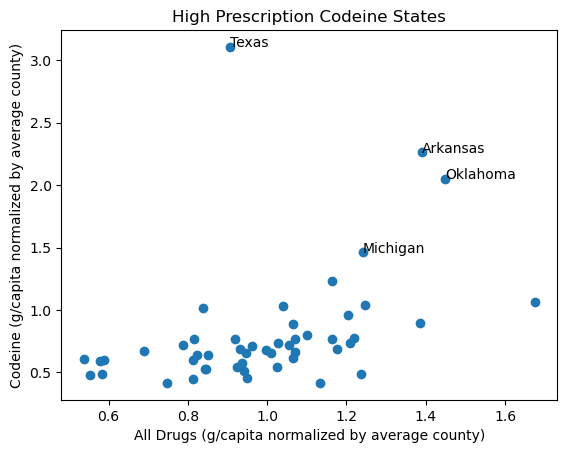

In [146]:
plt.scatter(all_values, codeine_values)
# make a label on the point if the state is Texas
for i, state in enumerate(states):
    if codeine_values[i] > 1.25:
        plt.text(all_values[i], codeine_values[i], state)

plt.title('High Prescription Codeine States')
plt.xlabel('All Drugs (g/capita normalized by average county)')
plt.ylabel('Codeine (g/capita normalized by average county)')
plt.show()

In [148]:
import plotly.graph_objects as go

# Create Scatter Plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=all_values,
    y=codeine_values,
    mode='markers+text',
    text=[state if state == 'TX' or codeine_values[i] > 1.25 else "" for i, state in enumerate(states)],
    textposition='top center',
    marker=dict(size=10, color='blue'),
    name="States"
))

# Add labels and title
fig.update_layout(
    title='High Prescription Codeine States',
    xaxis_title='All Drugs (g/capita normalized by average county)',
    yaxis_title='Codeine (g/capita normalized by average county)',
    showlegend=False
)

# Show Plot
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'blue', 'size': 10},
              'mode': 'markers+text',
              'name': 'States',
              'text': [, , , Arkansas, , , , , , , , , , , , , , , , , , Michigan,
                       , , , , , , , , , , , , , Oklahoma, , , , , , , Texas, , , ,
                       , , , ],
              'textposition': 'top center',
              'type': 'scatter',
              'x': [1.384751947574949, 0.8164655097025574, 1.219541408531164,
                    1.391296368425977, 1.0396894792696414, 0.8139521052097489,
                    0.8454129859267933, 1.2096315949812704, 1.0656846737558348,
                    1.065984200207729, 0.6894633993616822, 0.9981389593996246,
                    0.8384794478329609, 1.0258099844630082, 0.5838709018427644,
                    0.9467555010499944, 1.246722909679164, 1.16374357205404,
                    0.9303388392228549, 1.0277356138580238, 0.8435039863427997,
                    1.2415621432185622, 0.5878665524049578, 1.05623312546876,
                    1.1016062170624548, 0.9186817495162557, 0.5522171438963108,
                    1.176509220302283, 0.9493066180161456, 0.9611203410830047,
                    0.788980648097515, 0.8128692346856473, 1.1341392573394964,
                    0.5793473031666245, 0.8502797986607304, 1.4481882790040734,
                    1.0712031729420852, 1.0694689249259293, 0.9236216405510753,
                    1.2044848093377167, 0.537880608612906, 1.6752628490084587,
                    0.9057826306976229, 1.2364072591350517, 0.7476693987592572,
                    0.9414909870057718, 1.0090011801881993, 1.1627789190222462,
                    0.8230827574542896, 0.9367248283485042],
              'y': [0.8992297623891273, 0.771066054366228, 0.7760360288944704,
                    2.262134489505721, 1.0319860257107385, 0.448486547220951,
                    0.5294326534556983, 0.7358491732677505, 0.6165707341484715,
                    0.8858923687316129, 0.6734381603480143, 0.6759717810512538,
                    1.0182612834452922, 0.5440160501208624, 0.484180837537639,
                    0.6548790607466041, 1.0395479770147322, 0.7673139503288018,
                    0.685733653954266, 0.7330138234617464, 0.528074852327287,
                    1.4611661813628598, 0.6019637007821151, 0.7201276654309127,
                    0.8006812898409156, 0.770659754173461, 0.48228933125413675,
                    0.6843081302445803, 0.45789166537918535, 0.7116059445450715,
                    0.7193764447980762, 0.5960281419680717, 0.4162146547243439,
                    0.5914165857597949, 0.6385050492821941, 2.0504990672313204,
                    0.6639984922211709, 0.767190020345922, 0.5456691048198117,
                    0.9628179422721828, 0.6108766299002516, 1.064273769744403,
                    3.1074228689991137, 0.48862034024843176, 0.41736665327736566,
                    0.5124162837938525, 0.6572222719843906, 1.2340081963771325,
                    0.6366553791135329, 0.5794726799701294]}],
    'layout': {'showlegend': False,
               'template': '...',
               'title': {'text': 'High Prescription Codeine States'},
               'xaxis': {'title': {'text': 'All Drugs (g/capita normalized by average county)'}},
               'yaxis': {'title': {'text': 'Codeine (g/capita normalized by average county)'}}}
})

In [ ]:
single_state = 'Texas'
number_of_counties_per_date_st = df_drug[df_drug['state'] == single_state].groupby(['Date'])['placeDcid'].count().reset_index()
number_of_counties_per_date_st.columns = ['Date', 'num_counties']

In [99]:
## sums across all counties
grouped_df_drug_st = df_drug[df_drug['state'] == single_state].groupby(['Date']).sum().reset_index()
grouped_df_drug_all = df_drug.groupby(['Date']).sum().reset_index()
## divide all columns except Date by the number of counties
for drug in DRUG_NAMES:
    grouped_df_drug_st[drug] = grouped_df_drug_st[drug] / number_of_counties_per_date_st['num_counties']
    grouped_df_drug_all[drug] = grouped_df_drug_all[drug] / number_of_counties_per_date['num_counties']

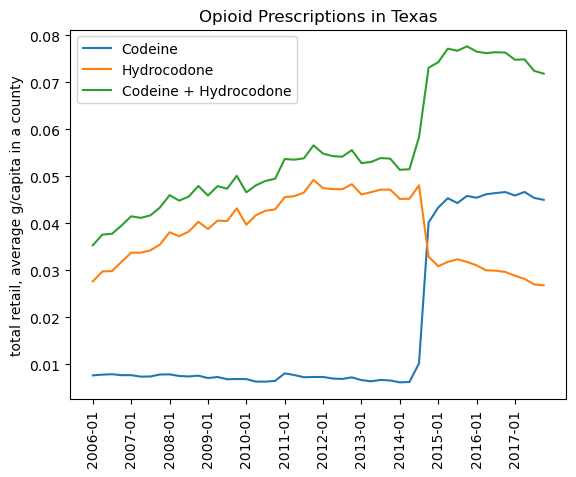

In [ ]:
# plt.plot(grouped_df_drug['Date'], grouped_df_drug['US_Amphetamine'], label='US_Amphetamine')
plt.plot(grouped_df_drug_st['Date'], grouped_df_drug_st['US_Codeine'], label='Codeine')
plt.plot(grouped_df_drug_st['Date'], grouped_df_drug_st['US_Hydrocodone'], label='Hydrocodone')
# plt.plot(grouped_df_drug['Date'], grouped_df_drug['US_Morphine'], label='US_Morphine')
# plt.plot(grouped_df_drug['Date'], grouped_df_drug['US_Oxycodone'], label='US_Oxycodone')
# plt.plot(grouped_df_drug['Date'], grouped_df_drug[['US_Amphetamine', 'US_Codeine', 'US_Hydrocodone', 'US_Morphine', 'US_Oxycodone']].sum(axis=1), label='total')
plt.plot(grouped_df_drug_st['Date'], grouped_df_drug_st[['US_Codeine', 'US_Hydrocodone']].sum(axis=1), label='Codeine + Hydrocodone')
plt.legend()

# only display certain dates in x axis:
plt.title(f'Opioid Prescriptions in {single_state}')
plt.xticks(ticks=range(0, len(grouped_df_drug_st['Date']), 4), labels=grouped_df_drug_st['Date'][::4], rotation=90)
plt.ylabel('total retail, average g/capita in a county')
plt.show()

In [26]:
import numpy as np

In [ ]:
len(grouped_df_drug)

48

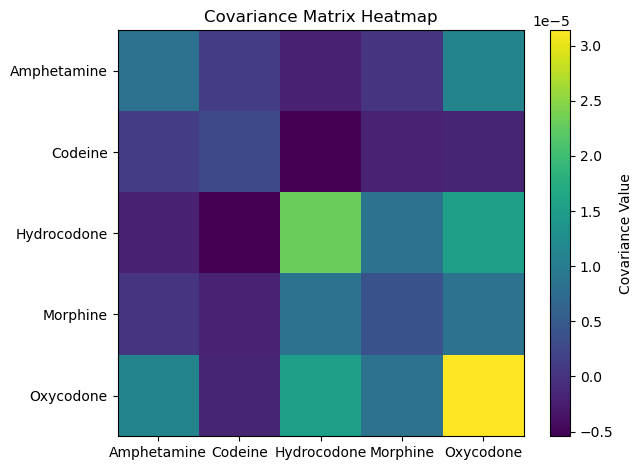

In [58]:
cov = np.cov(np.stack((grouped_df_drug['US_Amphetamine'], grouped_df_drug['US_Codeine'], grouped_df_drug['US_Hydrocodone'], grouped_df_drug['US_Morphine'], grouped_df_drug['US_Oxycodone']), axis=0))
plt.imshow(cov, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance Value')
plt.title('Covariance Matrix Heatmap')
# label categories
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['Amphetamine', 'Codeine', 'Hydrocodone', 'Morphine', 'Oxycodone'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Amphetamine', 'Codeine', 'Hydrocodone', 'Morphine', 'Oxycodone'])
# provide more space for the plot
plt.tight_layout()
plt.show()

Max Auto-Correlation: auto_corrs[0]: 0.006308447648044379


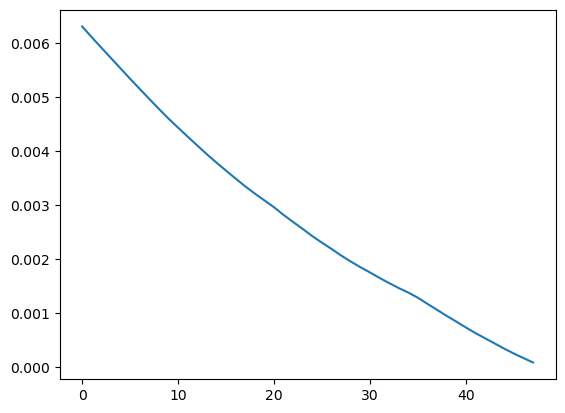

In [49]:
auto_corrs = np.correlate(grouped_df_drug['US_Codeine'], grouped_df_drug['US_Amphetamine'], mode='full')
auto_corrs = np.abs(auto_corrs[len(grouped_df_drug) - 1:])
i = np.argmax(auto_corrs)
print(f'Max Auto-Correlation: auto_corrs[{i}]: {auto_corrs[i]}')
plt.plot(auto_corrs)
plt.show()

In [50]:
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
0,geoId/01001,Autauga County,2006-01,0.006142,0.009288,0.030237,0.009621,0.014665,Alabama,2006,01001,49105.0
1,geoId/01001,Autauga County,2006-04,0.005641,0.010184,0.033431,0.010898,0.015806,Alabama,2006,01001,49105.0
2,geoId/01001,Autauga County,2006-07,0.005705,0.009007,0.033811,0.009363,0.014405,Alabama,2006,01001,49105.0
3,geoId/01001,Autauga County,2006-10,0.006587,0.008664,0.040262,0.009919,0.015670,Alabama,2006,01001,49105.0
4,geoId/01001,Autauga County,2007-01,0.006862,0.008974,0.039931,0.010602,0.015328,Alabama,2007,01001,49834.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150763,geoId/56045,Weston County,2016-10,0.008229,0.006252,0.014293,0.005815,0.022133,Wyoming,2016,56045,7228.0
150764,geoId/56045,Weston County,2017-01,0.008380,0.006658,0.014476,0.006185,0.022040,Wyoming,2017,56045,6962.0
150765,geoId/56045,Weston County,2017-04,0.007799,0.004660,0.013719,0.007518,0.022126,Wyoming,2017,56045,6962.0
150766,geoId/56045,Weston County,2017-07,0.009046,0.005172,0.013194,0.005415,0.020496,Wyoming,2017,56045,6962.0
